In [22]:
import pandas as pd

In [23]:
bank_train = pd.read_csv("C:/Users/jacob/Downloads/DSPR_Data_Sets/Website Data Sets/bank_marketing_training")

In [24]:
bank_train.shape

(26874, 21)

In [25]:
bank_train['index'] = pd.Series(range(26874))

In [26]:
bank_train.head(n=15)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,days_since_previous,previous,previous_outcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response,index
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,1
2,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,2
3,25,services,single,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,3
4,29,blue-collar,single,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,4
5,57,housemaid,divorced,basic.4y,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,5
6,35,blue-collar,married,basic.6y,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,6
7,39,management,single,basic.9y,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,7
8,30,unemployed,married,high.school,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,8
9,55,retired,single,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,9


In [27]:
import numpy as np

In [28]:
bank_train['days_since_previous'] = bank_train['days_since_previous'].replace({999: np.NaN})

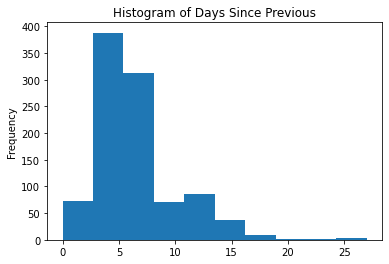

In [29]:
bank_train['days_since_previous'].plot(kind = 'hist', title = 'Histogram of Days Since Previous')

In [30]:
bank_train['education_numberic'] = bank_train['education']
dict_edu = {"education_numeric":{"illiterate":0, "basic.4y":4, "basic.6y":6, "basic.9y":9, "high.school":12, "professional.course": 12, "university.degree":16, "unknown": np.NaN}}
bank_train.replace(dict_edu, inplace=True)

In [31]:
from scipy import stats

In [32]:
bank_train['age_z'] = stats.zscore(bank_train['age'])

In [33]:
#bank_train.query('age_z > 3 | age_z < -3')
bank_train_outliers = bank_train.query('age_z > 3 | age_z < -3')
bank_train_sort = bank_train.sort_values(['age_z'], ascending = False)
bank_train_sort[['age' , 'marital']].head(n=15)

,age,marital
24840,91,married
24833,91,married
26520,89,divorced
26015,89,divorced
18179,88,divorced
18181,88,divorced
18183,88,divorced
18186,88,divorced
18187,88,divorced
18188,88,divorced
